In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from sklearn import metrics
from scipy.optimize import linear_sum_assignment as linear_assignment
from sklearn.cluster import SpectralClustering

In [2]:
def evaluate(y_true, y_predict):
    cm = metrics.confusion_matrix(y_true, y_predict)
    _make_cost_m = lambda x:-x + np.max(x)
    indexes = linear_assignment(_make_cost_m(cm))
    indexes = np.concatenate([indexes[0][:, np.newaxis], indexes[1][:, np.newaxis]], axis=-1)
    js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
    cm2 = cm[:, js]
    
    acc = np.trace(cm2) / np.sum(cm2)
    nmi = metrics.normalized_mutual_info_score(y_true, y_predict)
    ari = metrics.adjusted_rand_score(y_true, y_predict)

#     print(f'acc: {acc}')
#     print(f'nmi: {nmi}')
#     print(f'ari: {ari}')

    return acc, nmi, ari

def cast_to_array(y_str):
    y = re.sub('[^a-zA-Z0-9 ]', '', y_str).split(' ')
    y = np.array([int(l) for l in y])
    return y

In [106]:
data = pd.read_csv('../benchmark.csv', sep=';')
data.columns.values[0] = "order"

data.head()

,order,std,method_name,acc,nmi,ari
0,0,5.0,LRR_L1,0.464,0.499852,0.275646
1,1,5.0,LRR_L1,0.460,0.499637,0.276175
2,2,5.0,LRR_L1,0.464,0.499852,0.275646
3,3,5.0,LRR_L1,0.440,0.502029,0.252906
4,4,5.0,LRR_L1,0.460,0.499637,0.276175


In [107]:
methods = [
    'LRR_L1', 
    'LRR_L2', 
    'SSC', 
    'EDSC', 
    'ENSC', 
    'PARTY', 
    'DSC_Net', 
    'BDR',
    'DASC',
    'T-DSC_Vae', 
    'M-DSC_Vae'
]

stds = [5.0, 10.0, 15.0]

dic = {'method': [], 'std': [], 'accs': [], 'nmis': [], 'aris': []}
for method in methods:
    for std in stds:
        samples = data[(data['method_name'] == method) & (data['std'] == std)]
        samples.reset_index(inplace=True)

#         accs, nmis, aris = ([], [], [])
#         for i in range(samples.shape[0]):
# #             y_true = cast_to_array(samples.loc[i, 'y_true'])
# #             y_pred = cast_to_array(samples.loc[i, 'y_pred'])

# #             acc, nmi, ari = evaluate(y_true, y_pred)

#             accs.append(int(samples.loc[i, 'acc']))
#             nmis.append(int(samples.loc[i, 'nmi']))
#             aris.append(int(samples.loc[i, 'ari']))
            
        dic['method'].append(method)
        dic['std'].append(std)
        dic['accs'].append(samples['acc'].tolist())
        dic['nmis'].append(samples['nmi'].tolist())
        dic['aris'].append(samples['ari'].tolist())
df = pd.DataFrame(dic)

In [108]:
df.head(11)

,method,std,accs,nmis,aris
0,LRR_L1,5.0,"[0.464, 0.46, 0.464, 0.44, 0.46, 0.462, 0.464,...","[0.4998524438153799, 0.4996369608215092, 0.499...","[0.2756463180352634, 0.2761752598004406, 0.275..."
1,LRR_L1,10.0,"[0.436, 0.436, 0.438, 0.442, 0.436, 0.44, 0.44...","[0.5623063285267408, 0.5623063285267409, 0.559...","[0.3424995597401734, 0.3424995597401734, 0.344..."
2,LRR_L1,15.0,"[0.454, 0.454, 0.454, 0.454, 0.454, 0.454, 0.4...","[0.5107742537750394, 0.5107742537750395, 0.510...","[0.2631534685730328, 0.2631534685730328, 0.263..."
3,LRR_L2,5.0,"[0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.4...","[0.512927887022365, 0.5129278870223649, 0.5112...","[0.2999992899747477, 0.2999992899747477, 0.299..."
4,LRR_L2,10.0,"[0.624, 0.642, 0.642, 0.624, 0.63, 0.618, 0.63...","[0.6573790307843839, 0.6610487101049889, 0.661...","[0.4865614827399042, 0.4952428422734669, 0.495..."
5,LRR_L2,15.0,"[0.368, 0.36, 0.36, 0.36, 0.37, 0.368, 0.36, 0...","[0.5064358681379778, 0.5015435957870924, 0.501...","[0.2344241390602824, 0.2344260614477221, 0.231..."
6,SSC,5.0,"[0.216, 0.216, 0.216, 0.216, 0.216, 0.216, 0.2...","[0.2613893640413819, 0.2613893640413819, 0.261...","[0.0458355755542475, 0.0458355755542475, 0.045..."
7,SSC,10.0,"[0.142, 0.188, 0.182, 0.182, 0.18, 0.154, 0.15...","[0.0458708892103589, 0.0778179597722327, 0.070...","[-4.56428670583361e-05, 0.0046029865562823, 0...."
8,SSC,15.0,"[0.188, 0.174, 0.184, 0.176, 0.174, 0.208, 0.1...","[0.1368672368173321, 0.1508447729870232, 0.137...","[0.0174638966939064, 0.0139261835298509, 0.015..."
9,EDSC,5.0,"[0.594, 0.596, 0.596, 0.596, 0.592, 0.594, 0.5...","[0.7221547522743714, 0.7222300818619433, 0.722...","[0.50251392643643, 0.5021800626406492, 0.50218..."


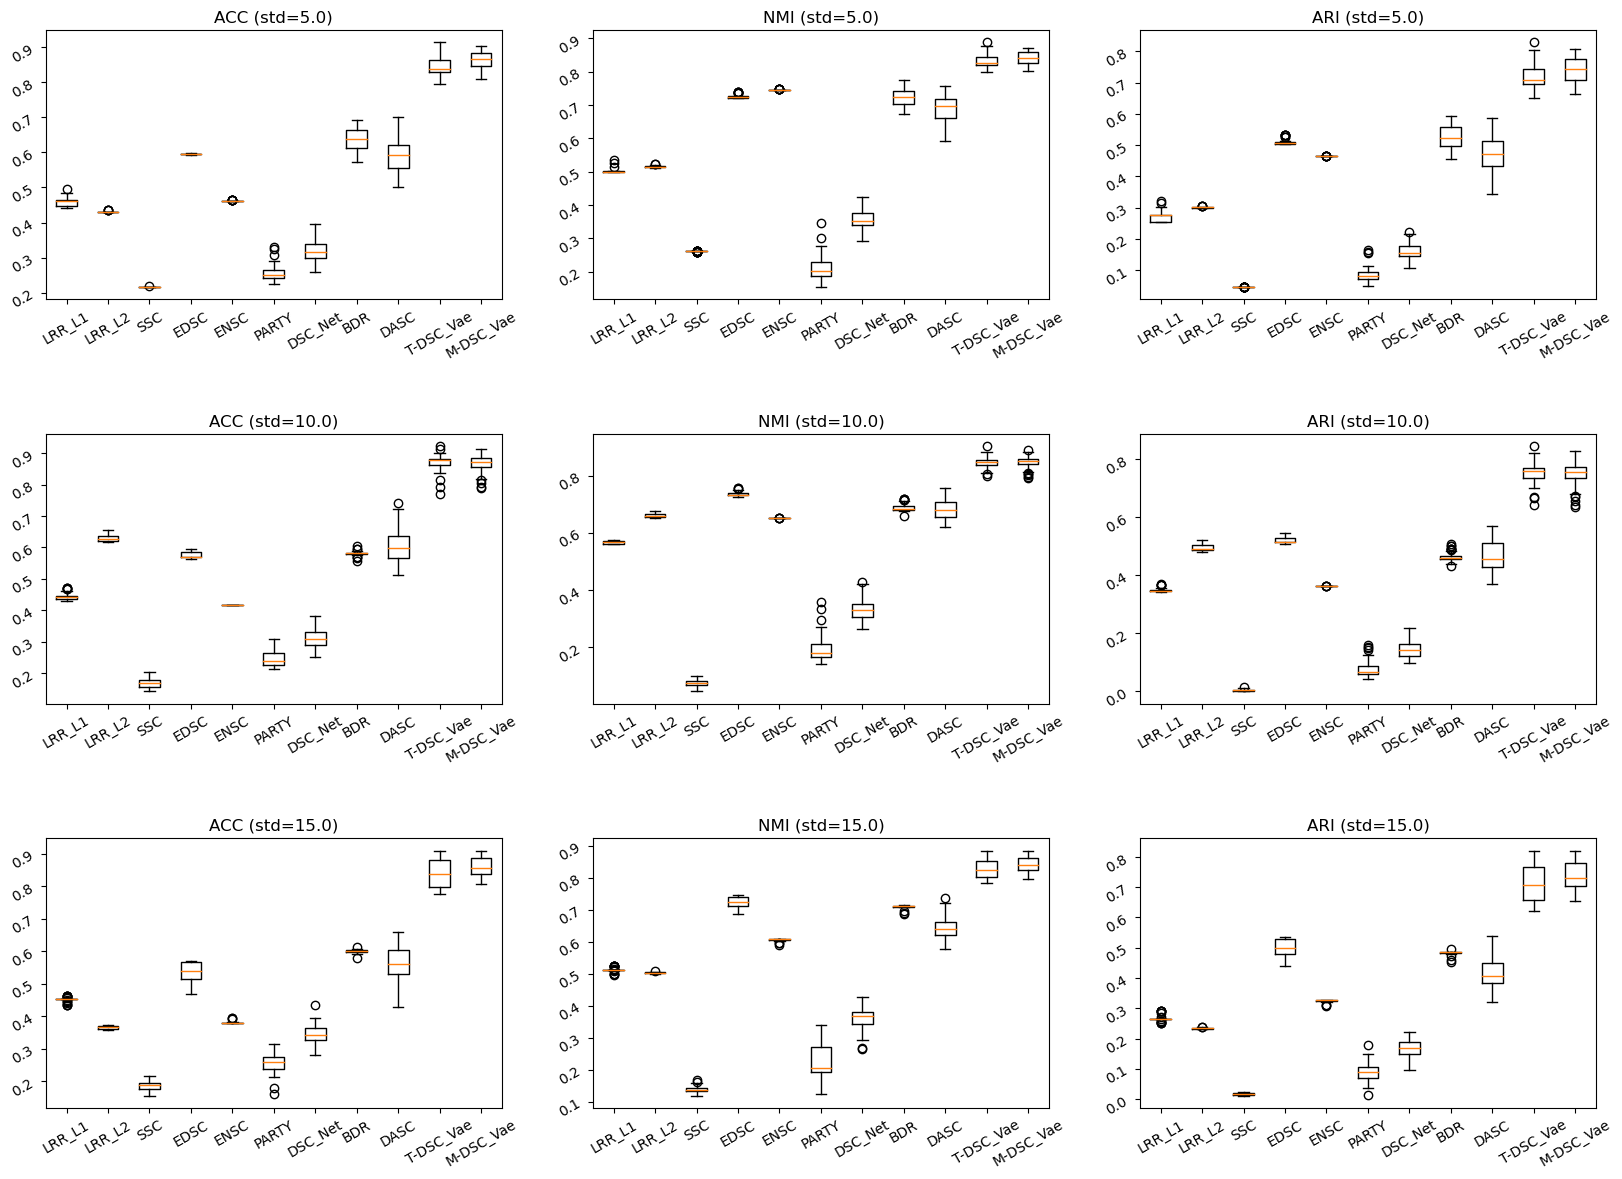

In [109]:
fig, axs = plt.subplots(3, 3, figsize=(20, 14))
fig.subplots_adjust(hspace=0.5)
for i, std in enumerate(stds):
    axs[i, 0].boxplot(df[df['std'] == std]['accs'], labels=df[df['std'] == std]['method'])
    axs[i, 0].set_title(f'ACC (std={std})')
    axs[i, 0].tick_params(labelrotation=30)
    
    axs[i, 1].boxplot(df[df['std'] == std]['nmis'], labels=df[df['std'] == std]['method'])
    axs[i, 1].set_title(f'NMI (std={std})')
    axs[i, 1].tick_params(labelrotation=30)
    
    axs[i, 2].boxplot(df[df['std'] == std]['aris'], labels=df[df['std'] == std]['method'])
    axs[i, 2].set_title(f'ARI (std={std})')
    axs[i, 2].tick_params(labelrotation=30)    

plt.show()

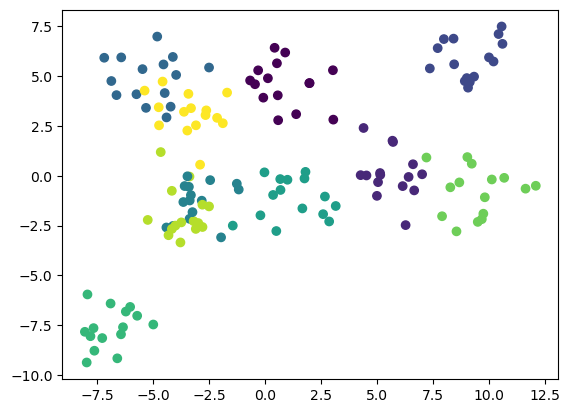

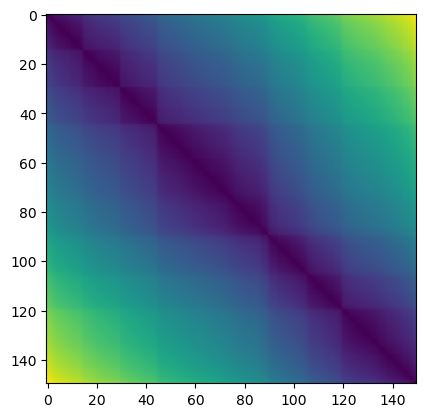

In [106]:
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances

X, y_true = make_blobs(n_samples=150, cluster_std=1.1, centers=10, n_features=10, random_state=0)
# X, y_true = make_circles(n_samples=150, noise=_std, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y_true)
plt.show()

_sorted = np.sort(np.concatenate([np.array(y_true)[:, None], X], axis=1), axis=0)
X = _sorted[:, 1:]

plt.imshow(pairwise_distances(X))
plt.show()